# Simulation: How Randomness Converges Over Time

This notebook simulates lottery draws to demonstrate how random processes
behave over increasing sample sizes and why short-term patterns
do not persist.


## 1. Why Simulate Randomness?

Simulation allows us to observe the behavior of a truly random system
without noise introduced by real-world data collection, rule changes,
or historical artifacts.

If lottery draws are random, simulated draws should exhibit the same
long-run behavior as real data.

## 2. Simulating Lottery Draws

We simulate white ball draws using the official lottery ranges
to create a baseline random process.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

def simulate_draws(n_draws, max_ball, balls_per_draw=5, seed=None):
    rng = np.random.default_rng(seed)
    draws = rng.integers(1, max_ball + 1, size=(n_draws, balls_per_draw))
    return draws


## 3. Frequency Behavior at Different Scales

We compare frequency distributions as the number of simulated draws increases
to observe how randomness stabilizes over time.

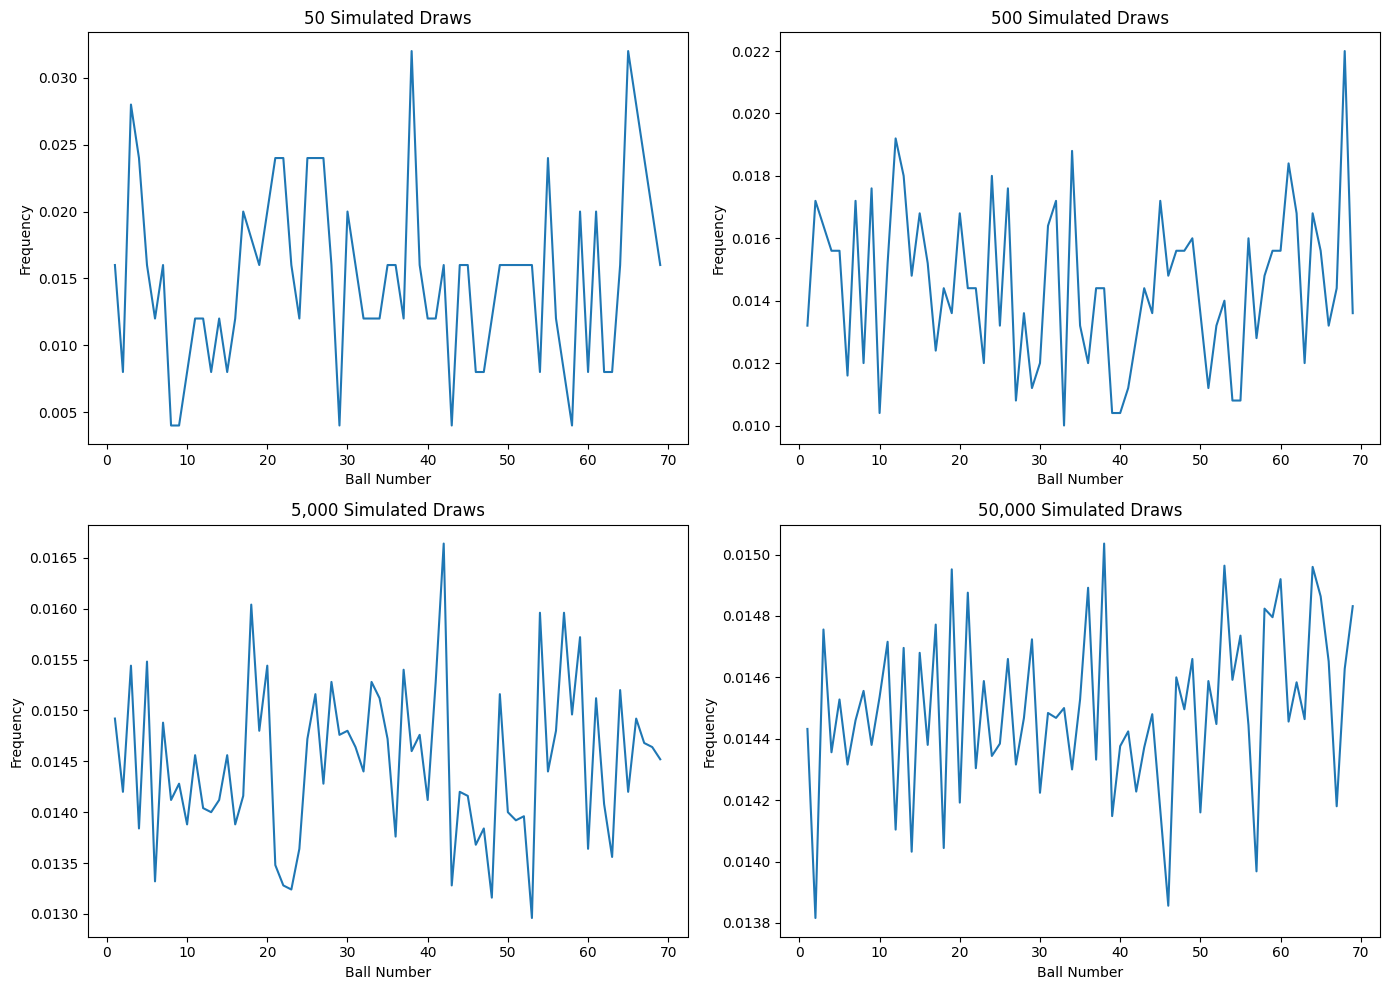

In [ ]:
SIZES = [50, 500, 5_000, 50_000]
MAX_BALL = 69  # Powerball white balls

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n in zip(axes, SIZES):
    draws = simulate_draws(n, MAX_BALL)
    flat = draws.flatten()

    freq = pd.Series(flat).value_counts().sort_index()
    rate = freq / freq.sum()

    ax.plot(rate.index, rate.values)
    ax.set_title(f"{n:,} Simulated Draws")
    ax.set_xlabel("Ball Number")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## 4. Comparing Simulation to Real Data

To validate the simulation, we compare its long-run distribution
to observed Powerball frequencies.

In [6]:

DATA_DIR = Path("../data/raw")

pb = json.loads((DATA_DIR / "powerball_draws.json").read_text())
df_pb = pd.DataFrame(pb)

real_flat = df_pb.explode("white_numbers")["white_numbers"]
real_freq = real_flat.value_counts().sort_index()
real_rate = real_freq / real_freq.sum()

sim_draws = simulate_draws(50_000, MAX_BALL, seed=42)
sim_flat = sim_draws.flatten()
sim_rate = pd.Series(sim_flat).value_counts().sort_index()
sim_rate = sim_rate / sim_rate.sum()


## 5. Key Takeaways

- Random processes stabilize only over large sample sizes.
- Short-term patterns are a natural byproduct of variance.
- Simulation mirrors real lottery behavior under randomness.
- Randomness explains perceived patterns without prediction.
